In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [8]:
data = pd.read_csv("D:\Titanic-Dataset.csv")


In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
null_values = data.isnull().sum()
print(null_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [38]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [35]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)

In [39]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [40]:
null_values = data.isnull().sum()
print(null_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


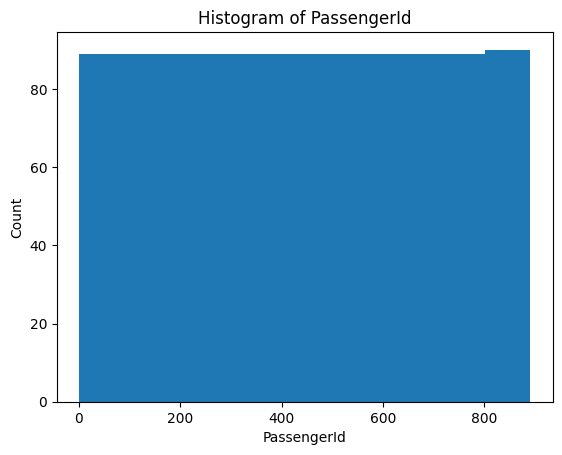

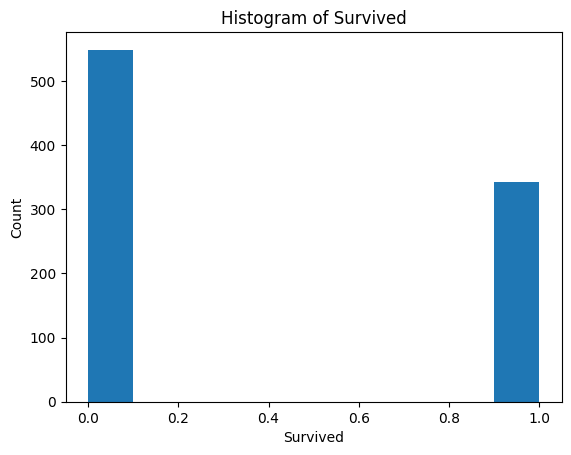

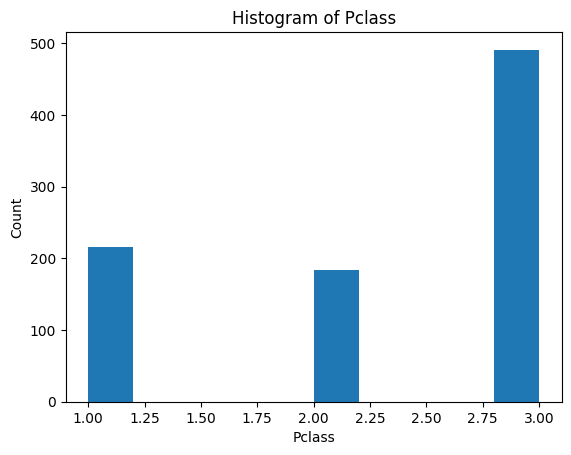

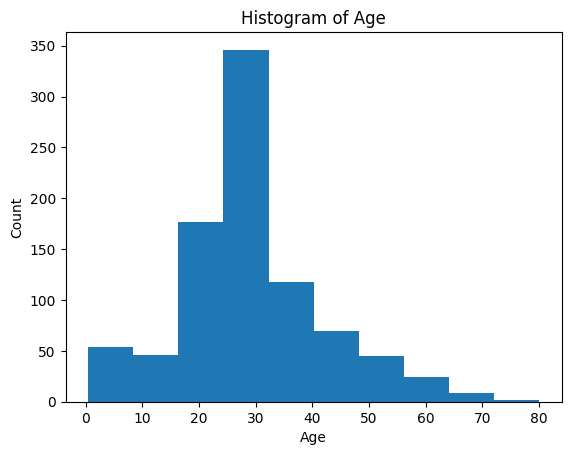

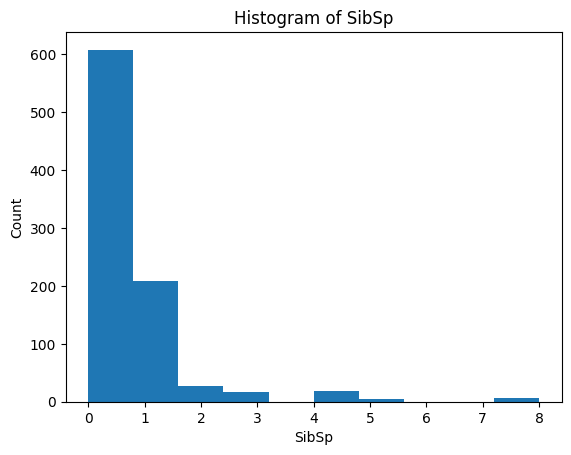

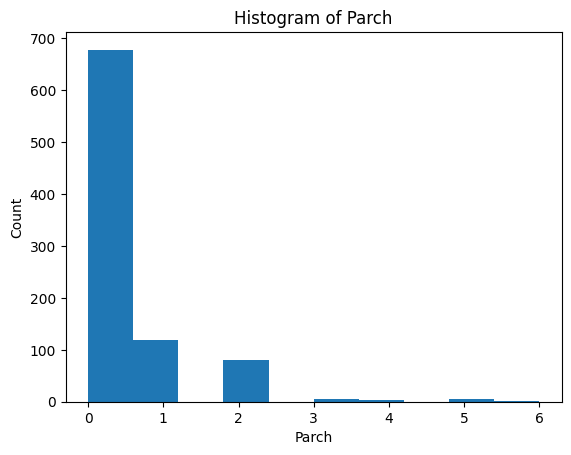

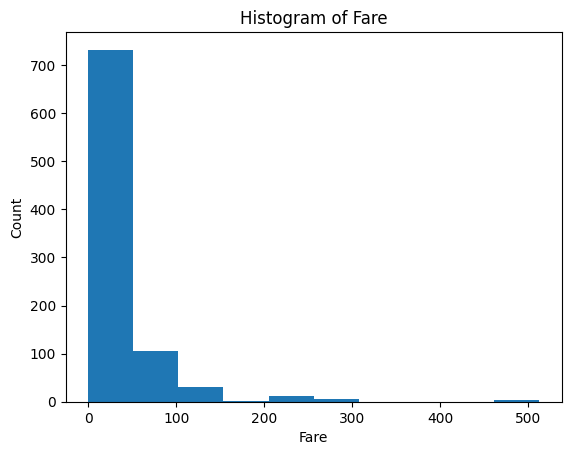

In [41]:
# Plot a histogram of each numeric column in the DataFrame
for col in data.select_dtypes(include=['int64', 'float64']):
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [47]:
from scipy.stats import iqr

for col in data.select_dtypes(include=['int64', 'float64']):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers as data points that fall outside the IQR range
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Print the number of outliers in the column
    print('Number of outliers in {}: {}'.format(col, len(outliers)))

Number of outliers in PassengerId: 0
Number of outliers in Survived: 0
Number of outliers in Pclass: 0
Number of outliers in Age: 67
Number of outliers in SibSp: 36
Number of outliers in Parch: 166
Number of outliers in Fare: 25


In [50]:
data.drop(outliers.index, inplace=True)
 


In [52]:
X = data.drop(['Survived'], axis=1)  # Independent variables
y = data['Survived']  # Dependent variable


In [53]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])


In [54]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Perform one-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


In [58]:
# Select features (independent variables) and target (dependent variable)
X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']


In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with an increased max_iter
logistic_regression = LogisticRegression(max_iter=1000)


In [64]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with adjusted parameters
logistic_regression = LogisticRegression(max_iter=1000, solver='lbfgs')

# Train the model on the scaled data
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = logistic_regression.predict(X_test_scaled)

# Continue with model evaluation (e.g., accuracy, confusion matrix, classification report)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Display classification report and confusion matrix
print("Classification Report (Logistic Regression):\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, logistic_predictions))

# Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Display classification report and confusion matrix
print("Classification Report (Random Forest Classifier):\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix (Random Forest Classifier):\n", confusion_matrix(y_test, rf_predictions))


C:\Users\Laptop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7919463087248322
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.66      0.61      0.64        44

    accuracy                           0.79       149
   macro avg       0.75      0.74      0.74       149
weighted avg       0.79      0.79      0.79       149

Confusion Matrix (Logistic Regression):
 [[91 14]
 [17 27]]
Random Forest Classifier Accuracy: 0.8187919463087249
Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.71      0.66      0.68        44

    accuracy                           0.82       149
   macro avg       0.78      0.77      0.78       149
weighted avg       0.82      0.82      0.82       149

Confusion Matrix (Random Forest Classifier):
 [[93 12]
 [15 29]]
